In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Creating a dataframe with SPY's historic prices since 1993
df_sp = pd.read_csv('/content/drive/MyDrive/SPY-2.csv')

In [19]:
# Assigning arrays to SPY's open and close prices and dates
open_sp = np.array(df_sp['Open'])
close_sp = np.array(df_sp['Close'])
date = np.array(df_sp['Date'])

# Creating an array that consists of all the daily returns in SPY
daily_returns_sp = (close_sp - open_sp)/open_sp

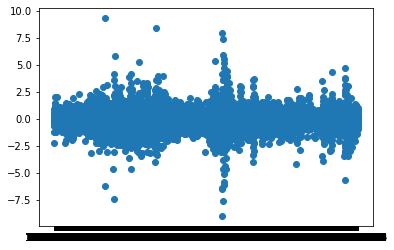

In [5]:
# Plotting the daily returns VS respect to time
plt.scatter(date, daily_returns_sp)
plt.show()

In [20]:
simulated_yearly_returns_sp = []
simulated_yearly_returns_3x_sp = []

In [21]:
# 10,000 simulated "years"
for i in range(10000):

  # Since there are 250 trading days in a year, 
  # randomly selecting 250 daily return rates from SPY since 1993 (with replacement)
  simulated_dr = np.random.choice(daily_returns_sp, 250)

  # Finding and appending the yearly return in the S&P based on the 250 simulated daily returns that make up a year
  simulated_yearly_returns_sp.append(100*np.product(1 + simulated_dr) - 100)

  # Finding and appending the yearly return in the leveraged ETF by multiplying the simulated daily returns by 3
  simulated_yearly_returns_3x_sp.append(100*np.product(1 + 3*simulated_dr) - 100)

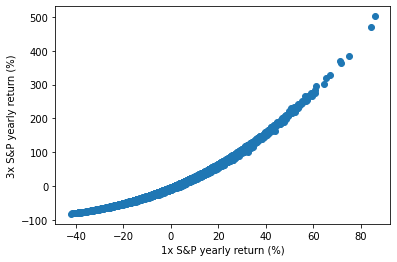

In [22]:
# Plotting the simulated returns of a 3x leveraged fund vs that of the underlying (1x) fund

plt.scatter(simulated_yearly_returns_sp, simulated_yearly_returns_3x_sp)
plt.xlabel('1x S&P yearly return (%)')
plt.ylabel('3x S&P yearly return (%)')
plt.show()

In [23]:
# Can see that 3x daily leverage is NOT a double-edged sword in the long run
# The leveraged fund overperforms the 3x target if the underlying has a positive return (so if the underlying has a 5% return one year, the 3x fund has a return of MORE than 15%)
# On the other hand, the leveraged fund underperforms the 3x target if the underlying has a negative return (so if the underlying has a 5% decline one year, the 3x fund declines by LESS than 15%)

In [24]:
# Fitting a 3rd degree (cubic) polynomial model to the data
model_sp = np.poly1d(np.polyfit(simulated_yearly_returns_sp, simulated_yearly_returns_3x_sp, 3))
x_sp = np.linspace(-100, 100, num=200)

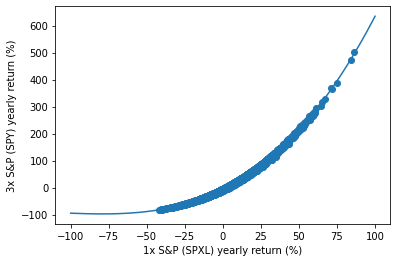

In [25]:
plt.scatter(simulated_yearly_returns_sp, simulated_yearly_returns_3x_sp)
plt.xlabel('1x S&P (SPXL) yearly return (%)')
plt.ylabel('3x S&P (SPY) yearly return (%)')
plt.plot(x_sp, model_sp(x_sp))
plt.show()

In [26]:
model_sp.coefficients

array([ 8.32600545e-05,  2.76518490e-02,  2.81215589e+00, -6.66582031e+00])

In [27]:
# Testing the model to see how it performs with actual historical data since 2009 (when SPXL was established)
# Inputting SPY's yearly return to the model in the "predicted" list
# And setting the "actual" list equal to the actual return of SPXL
predicted = [model_sp(18.25), model_sp(31.29), model_sp(-4.45), model_sp(21.69), model_sp(11.8), model_sp(1.34), model_sp(13.53), model_sp(32.21), model_sp(15.84), model_sp(2.06), model_sp(14.92), model_sp(26.42)]
actual = [9.73, 103.30, -24.86, 70.89, 29.37, -5.48, 37.82, 117.94, 44.00, -14.57, 38.89, 64.02]

In [29]:
average_error = 0
for i in range(len(actual)):
  average_error += abs(actual[i]-predicted[i])
average_error /= 12

In [30]:
average_error

9.245865921247796

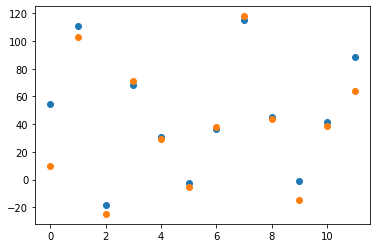

In [ ]:
# Seeing how the predictions compare to the actual data
plt.scatter([i for i in range(12)], predicted)
plt.scatter([i for i in range(12)], actual)

Next steps:


*   Further testing
*   Finding a function that gives the estimated return of the leveraged ETF based on the time (T), volatility (sigma), leverage (x), and underlying return (r).

